In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.selfcal import generate_catalog, OffsetSys, OffsetSNR
import sqlite3
from rubin_sim.data import get_baseline

from rubin_sim.utils import healbin
import healpy as hp

In [15]:
ss = np.load('solved_stars.npz')['result']

In [16]:
sp = np.load('solved_patches.npz')['result']

In [17]:
ss['id']

array([     63,      66,      67, ..., 1337078, 1337079, 1337080])

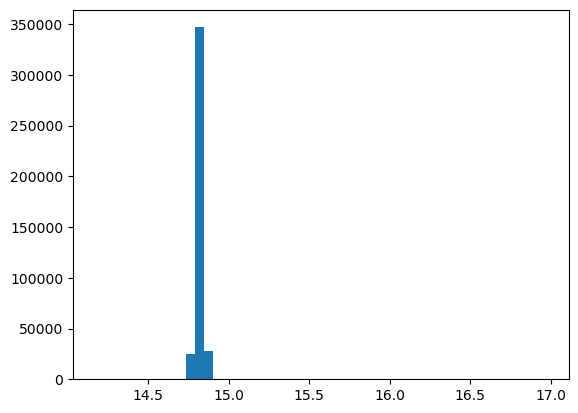

In [18]:
_temp = plt.hist(sp['zp'], bins=50)

In [19]:
filter_name = "u"
con = sqlite3.connect("msrgb_1e6.sqlite")
stars_df = pd.read_sql("select id,ra,decl,%smag from stars;" % filter_name, con)
con.close()

# what is the right way to do this? There's gotta be a better way!
names =['id', 'ra', 'decl', '%smag' % filter_name]
types = [int, float, float, float]
stars = np.empty(stars_df.shape[0], dtype=list(zip(names, types)))
for key in names:
    stars[key] = stars_df[key].values


In [20]:
stars_trimmed = stars[np.in1d(stars['id'], ss['id'])]

In [21]:
stars_trimmed

array([(     63, 122.849, -89.3044  , 18.8551),
       (     66, 129.327, -89.0203  , 18.7526),
       (     67, 130.373, -89.2737  , 18.4684), ...,
       (1337078, 337.148,  -0.788291, 18.013 ),
       (1337079, 345.546,  -0.758393, 19.284 ),
       (1337080, 353.166,  -0.94849 , 18.7707)],
      dtype=[('id', '<i8'), ('ra', '<f8'), ('decl', '<f8'), ('umag', '<f8')])

In [22]:
ss

array([(     63, 4.00660407), (     66, 3.93846038),
       (     67, 3.67099976), ..., (1337078, 3.20314674),
       (1337079, 4.46878797), (1337080, 3.91947069)],
      dtype=[('id', '<i8'), ('fit_mag', '<f8')])

In [23]:
resid = stars_trimmed['%smag' % filter_name] - ss['fit_mag']
resid = resid - np.median(resid)

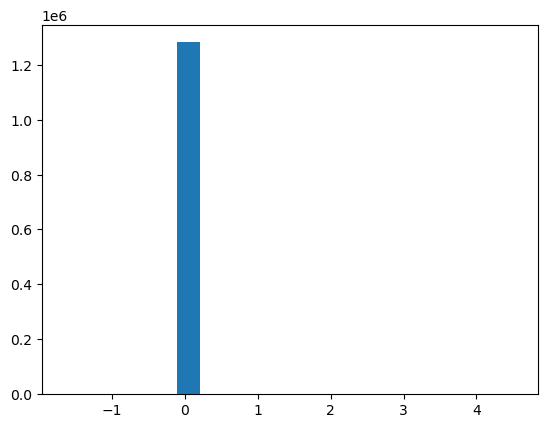

In [24]:
_temp = plt.hist(resid, bins=20)

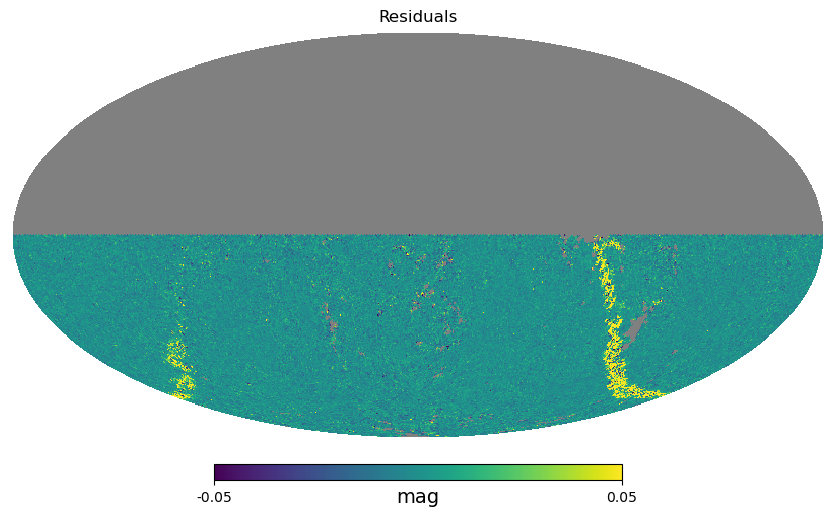

In [30]:
resid_map = healbin(stars_trimmed["ra"], stars_trimmed["decl"], resid, 128, reduce_func=np.mean)
hp.mollview(resid_map, min=-0.05, max=0.05, title='Residuals', unit='mag')

In [ ]:
np.std(resid)